In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/'My Drive'/'Colab Notebooks'/Data
%ls

/content/drive/My Drive/Colab Notebooks/Data
breast-cancer.data  car.data    SPECTF.test   transfusion.data
breastCancer.xlsx   ecoli.data  SPECTF.train


In [4]:
import pandas as pd
ecoli_df = pd.read_csv("ecoli.data", header= None,delim_whitespace=True)
breastCancer_df = pd.read_csv("breast-cancer.data",header= None)
transfusion_df = pd.read_csv("transfusion.data")

In [5]:
breastCancer_df.columns = ['class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','Label']
breastCancer_df

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,Label
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [6]:
ecoli_df.columns = ['sequence','mcg','gvh','lip','chg','aac','alm1','alm2','Label']
from sklearn.preprocessing import LabelEncoder
ecoli_df_updated = ecoli_df.drop('sequence',axis=1)
ecoli_df_updated

,mcg,gvh,lip,chg,aac,alm1,alm2,Label
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [7]:
transfusion_df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [8]:
breastCancer_df.info()
print(breastCancer_df.head())
print(breastCancer_df.tail())
breastCancer_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   Label        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB
                  class    age menopause  ... breast breast-quad Label
0  no-recurrence-events  30-39   premeno  ...   left    left_low    no
1  no-recurrence-events  40-49   premeno  ...  right    right_up    no
2  no-recurrence-events  40-49   premeno  ...   left    left_low    no
3  no-recurrence-events  60-69      ge40  ...  right     left_up    

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


A lot of classication data that will need to be converted but otherwise not too difficult.

In [9]:
transfusion_df.info()
print(transfusion_df.head())
print(transfusion_df.tail())
transfusion_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
   Recency (months)  ...  whether he/she donated blood in March 2007
0                 2  ...                                           1
1                 0  ...                                           1
2                 1  ...                                           1
3                 2  ...                                           1
4              

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


A lot more data than the other datasets so it would take longer to find a fit for it. All the data is numeric so no need to convert but the values all have different ranges so may want to consider scaling.

In [10]:
ecoli_df_updated.info()
print(ecoli_df_updated.head())
print(ecoli_df_updated.tail())
ecoli_df_updated.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     336 non-null    float64
 1   gvh     336 non-null    float64
 2   lip     336 non-null    float64
 3   chg     336 non-null    float64
 4   aac     336 non-null    float64
 5   alm1    336 non-null    float64
 6   alm2    336 non-null    float64
 7   Label   336 non-null    object 
dtypes: float64(7), object(1)
memory usage: 21.1+ KB
    mcg   gvh   lip  chg   aac  alm1  alm2 Label
0  0.49  0.29  0.48  0.5  0.56  0.24  0.35    cp
1  0.07  0.40  0.48  0.5  0.54  0.35  0.44    cp
2  0.56  0.40  0.48  0.5  0.49  0.37  0.46    cp
3  0.59  0.49  0.48  0.5  0.52  0.45  0.36    cp
4  0.23  0.32  0.48  0.5  0.55  0.25  0.35    cp
      mcg   gvh   lip  chg   aac  alm1  alm2 Label
331  0.74  0.56  0.48  0.5  0.47  0.68  0.30    pp
332  0.71  0.57  0.48  0.5  0.48  0.35  0.32    pp
333  0.61  0.60  0.48  0.5

,mcg,gvh,lip,chg,aac,alm1,alm2
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


All the data for ecoli is numeric expect the label which we will have to encode.

In [11]:
transfusion_df[(transfusion_df.isna().any(axis=1))]

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007


In [12]:
ecoli_df_updated[(ecoli_df_updated.isna().any(axis=1))]

,mcg,gvh,lip,chg,aac,alm1,alm2,Label


In [13]:
transfusionLabel = transfusion_df['whether he/she donated blood in March 2007']

In [14]:
transfusion_df_features = transfusion_df.drop('whether he/she donated blood in March 2007', axis= 1)

In [15]:
transfusion_df_features

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
743,23,2,500,38
744,21,2,500,52
745,23,3,750,62
746,39,1,250,39


In [16]:
cancer_df = breastCancer_df.drop(breastCancer_df.index[[145,163,164,183,184,206,233,263,264]])

In [17]:
cancer_df

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,Label
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cancer_df:
  cancer_df[col] = le.fit_transform(cancer_df[col])
cancer_features_encode = cancer_df.drop('Label',axis=1)
cancer_label = cancer_df['Label']

In [19]:
cancer_features_encode

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad
0,0,1,2,5,0,0,2,0,1
1,0,2,2,3,0,0,1,1,4
2,0,2,2,3,0,0,1,0,1
3,0,4,0,2,0,0,1,1,2
4,0,2,2,0,0,0,1,1,3
...,...,...,...,...,...,...,...,...,...
281,1,1,2,5,0,0,1,0,2
282,1,1,2,3,0,0,2,0,2
283,1,4,0,3,0,0,0,1,2
284,1,2,0,5,4,0,2,0,1


In [20]:
from sklearn.preprocessing import LabelEncoder
ecoli_df_updated['Label'] = LabelEncoder().fit_transform(ecoli_df['Label'])

In [21]:
ecoli_df_features = ecoli_df_updated.drop('Label',axis =1)
ecoli_df_features

,mcg,gvh,lip,chg,aac,alm1,alm2
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35
...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37


In [22]:
ecoliLabel = ecoli_df_updated['Label']

In [23]:
import scipy.spatial.distance as distance
# euclidean distance
distance.euclidean

# Minkowski distance
distance.minkowski

# cosine distance
distance.cosine

<function scipy.spatial.distance.cosine>

In [24]:
def chi_square_distance(X, Y):
    with np.errstate(divide="ignore", invalid="ignore"):
        return (1 / 2) * np.sum(np.nan_to_num((np.square(X - Y) / (X + Y))))

In [25]:
#breastCancer section
from sklearn.model_selection import train_test_split
cancer_train, cancer_test, cancerLabel_train , cancerLabel_test = train_test_split(cancer_features_encode,cancer_label, test_size = 0.1, random_state = 12)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import scipy.spatial.distance as distance
import numpy as np

n_neighbors = [int(x) for x in np.linspace(1, 15, num = 15)]
metric = [chi_square_distance, distance.euclidean, distance.minkowski, distance.cosine]
param_distribs = {'n_neighbors':n_neighbors,'metric': metric}
estimator = KNeighborsClassifier()
from sklearn.model_selection import RepeatedKFold
skfold = RepeatedKFold(n_splits=10,n_repeats=10,random_state=1)
grid_search = GridSearchCV(estimator, param_distribs, n_jobs=5,cv=skfold)

In [27]:
grid_search.fit(cancer_train,cancerLabel_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=1),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=5,
             param_grid={'metric': [<function chi_square_distance at 0x7fd519f8c2f0>,
                                    <function euclidean at 0x7fd520528510>,
                                    <function minkowski at 0x7fd520528400>,
                                    <function cosine at 0x7fd5205286a8>],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_

In [28]:
df_cv = pd.DataFrame(grid_search.cv_results_)
df_cv_updated = df_cv[['param_metric','param_n_neighbors','mean_test_score']]

In [29]:
metrics = ['chi_square_distance','chi_square_distance','chi_square_distance','chi_square_distance','chi_square_distance','chi_square_distance','chi_square_distance','chi_square_distance','chi_square_distance','chi_square_distance','chi_square_distance','chi_square_distance','chi_square_distance','chi_square_distance','chi_square_distance',
           'euclidean','euclidean','euclidean','euclidean','euclidean','euclidean','euclidean','euclidean','euclidean','euclidean','euclidean','euclidean','euclidean','euclidean','euclidean',
           'minkowski','minkowski','minkowski','minkowski','minkowski','minkowski','minkowski','minkowski','minkowski','minkowski','minkowski','minkowski','minkowski','minkowski','minkowski',
           'cosine','cosine','cosine','cosine','cosine','cosine','cosine','cosine','cosine','cosine','cosine','cosine','cosine','cosine','cosine']

In [ ]:
df_cv_updated['metrics'] = metrics
df_cv_updated

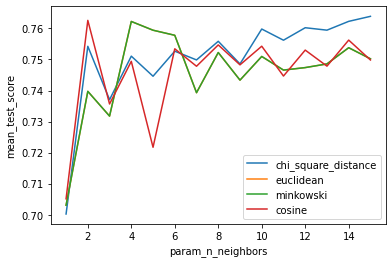

In [31]:
import matplotlib.pyplot as plt
chi = df_cv_updated.drop(df_cv_updated.index[range(15,60)])
euclidean = df_cv_updated.drop(df_cv_updated.index[30:])
euclidean = euclidean.drop(euclidean.index[range(0,15)])
minkowski = df_cv_updated.drop(df_cv_updated.index[45:])
minkowski = minkowski.drop(minkowski.index[range(0,30)])
cosine = df_cv_updated.drop(df_cv_updated.index[:45])
plt.plot(chi['param_n_neighbors'],chi['mean_test_score'], label = 'chi_square_distance')
plt.plot(euclidean['param_n_neighbors'],euclidean['mean_test_score'],label = 'euclidean')
plt.plot(minkowski['param_n_neighbors'],minkowski['mean_test_score'],label = 'minkowski')
plt.plot(cosine['param_n_neighbors'],cosine['mean_test_score'],label = 'cosine')
plt.xlabel('param_n_neighbors')
plt.ylabel('mean_test_score')
plt.legend()
plt.show()

In [32]:
#ecoli section
from sklearn.model_selection import train_test_split
ecoli_train, ecoli_test, ecoliLabel_train , ecoliLabel_test = train_test_split(ecoli_df_updated,ecoliLabel, test_size = 0.1, random_state = 12)

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import scipy.spatial.distance as distance
import numpy as np

n_neighbors = [int(x) for x in np.linspace(1, 15, num = 15)]
metric = [chi_square_distance, distance.euclidean, distance.minkowski, distance.cosine]
param_distribs = {'n_neighbors':n_neighbors,'metric': metric}
estimator = KNeighborsClassifier()
from sklearn.model_selection import RepeatedKFold
skfold = RepeatedKFold(n_splits=10,n_repeats=10,random_state=1)
grid_search = GridSearchCV(estimator, param_distribs, n_jobs=-1,cv=skfold)

In [53]:
grid_search.fit(ecoli_train,ecoliLabel_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=1),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': [<function chi_square_distance at 0x7fd519f8c2f0>,
                                    <function euclidean at 0x7fd520528510>,
                                    <function minkowski at 0x7fd520528400>,
                                    <function cosine at 0x7fd5205286a8>],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train

In [55]:
df_cv = pd.DataFrame(grid_search.cv_results_)
df_cv_updated = df_cv[['param_metric','param_n_neighbors','mean_test_score']]

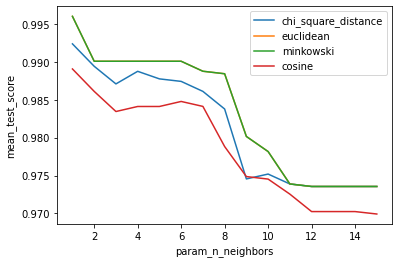

In [57]:
import matplotlib.pyplot as plt
chi = df_cv_updated.drop(df_cv_updated.index[range(15,60)])
euclidean = df_cv_updated.drop(df_cv_updated.index[30:])
euclidean = euclidean.drop(euclidean.index[range(0,15)])
minkowski = df_cv_updated.drop(df_cv_updated.index[45:])
minkowski = minkowski.drop(minkowski.index[range(0,30)])
cosine = df_cv_updated.drop(df_cv_updated.index[:45])
plt.plot(chi['param_n_neighbors'],chi['mean_test_score'], label = 'chi_square_distance')
plt.plot(euclidean['param_n_neighbors'],euclidean['mean_test_score'],label = 'euclidean')
plt.plot(minkowski['param_n_neighbors'],minkowski['mean_test_score'],label = 'minkowski')
plt.plot(cosine['param_n_neighbors'],cosine['mean_test_score'],label = 'cosine')
plt.xlabel('param_n_neighbors')
plt.ylabel('mean_test_score')
plt.legend()
plt.show()

In [41]:
#transfusion section
from sklearn.model_selection import train_test_split
blood_train, blood_test, bloodLabel_train , bloodLabel_test = train_test_split(transfusion_df_features,transfusionLabel, test_size = 0.1, random_state = 12)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import scipy.spatial.distance as distance
import numpy as np

n_neighbors = [int(x) for x in np.linspace(1, 15, num = 15)]
metric = [chi_square_distance, distance.euclidean, distance.minkowski, distance.cosine]
param_distribs = {'n_neighbors':n_neighbors,'metric': metric}
estimator = KNeighborsClassifier()
from sklearn.model_selection import RepeatedKFold
skfold = RepeatedKFold(n_splits=10,n_repeats=10,random_state=1)
grid_search = GridSearchCV(estimator, param_distribs, n_jobs=5,cv=skfold)

In [43]:
grid_search.fit(blood_train,bloodLabel_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=1),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=5,
             param_grid={'metric': [<function chi_square_distance at 0x7fd519f8c2f0>,
                                    <function euclidean at 0x7fd520528510>,
                                    <function minkowski at 0x7fd520528400>,
                                    <function cosine at 0x7fd5205286a8>],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_

In [46]:
df_cv = pd.DataFrame(grid_search.cv_results_)
df_cv_updated = df_cv[['param_metric','param_n_neighbors','mean_test_score']]

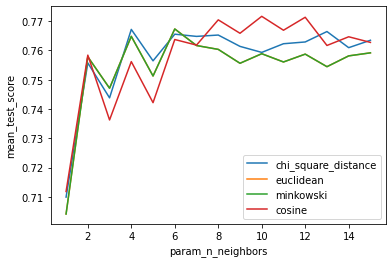

In [47]:
import matplotlib.pyplot as plt
chi = df_cv_updated.drop(df_cv_updated.index[range(15,60)])
euclidean = df_cv_updated.drop(df_cv_updated.index[30:])
euclidean = euclidean.drop(euclidean.index[range(0,15)])
minkowski = df_cv_updated.drop(df_cv_updated.index[45:])
minkowski = minkowski.drop(minkowski.index[range(0,30)])
cosine = df_cv_updated.drop(df_cv_updated.index[:45])
plt.plot(chi['param_n_neighbors'],chi['mean_test_score'], label = 'chi_square_distance')
plt.plot(euclidean['param_n_neighbors'],euclidean['mean_test_score'],label = 'euclidean')
plt.plot(minkowski['param_n_neighbors'],minkowski['mean_test_score'],label = 'minkowski')
plt.plot(cosine['param_n_neighbors'],cosine['mean_test_score'],label = 'cosine')
plt.xlabel('param_n_neighbors')
plt.ylabel('mean_test_score')
plt.legend()
plt.show()

Breast Cancer
Highest accuracy at ~0.765 for K = 15 and using chi_square_distance



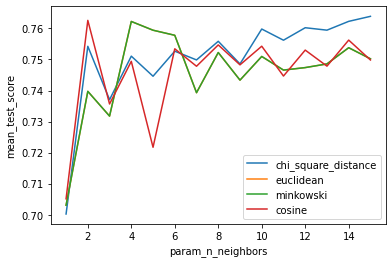

Ecoli
Highest accuracy at ~0.996 for K = 1 and using minkowski

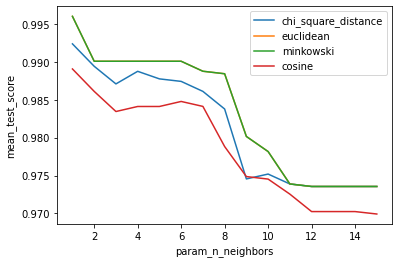

Transfusion
highest accuracy ~0.77 at K = 9 and using cosine

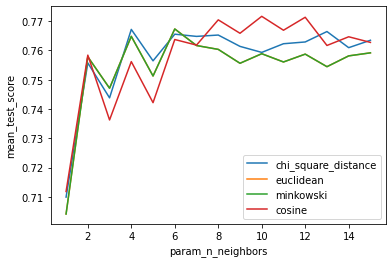